#Most dominant colors

1. Get the image
2. Define number of clusters 
3. convert to rgb vector space


In [59]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

(1440, 2560, 3)
(320, 480, 3)


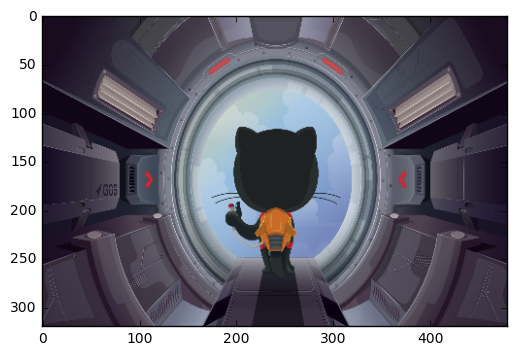

In [5]:
im=cv2.imread('git.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
img=cv2.resize(im,(480,320))
print im.shape
print img.shape
plt.imshow(img)
plt.show()

In [6]:
image_vector=img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
print image_vector.shape

(153600, 3)


In [10]:
def dist(p1,p2):
    return np.sqrt(sum((p1-p2)**2))

In [28]:
k=3
centers=np.random.uniform(low=image_vector.min(),high=image_vector.max(),size=(k,image_vector.shape[1]))
clusters={}
shifts={}
for ix in range(k):
    clusters[ix]={
        'center':centers[ix],
        'points':[]
    }
    shifts[ix]=[]
print clusters 

{0: {'points': [], 'center': array([ 148.94304248,   44.15890696,   77.78619935])}, 1: {'points': [], 'center': array([ 180.92380518,   52.47343385,  189.93655041])}, 2: {'points': [], 'center': array([ 201.73003867,   31.34236661,  239.79377409])}}


In [31]:
for px in image_vector :
    distance=[]
    for ix in range(k):
        distance.append(dist(px,clusters[ix]['center']))
    distance=np.array(distance)
    #print distance
    ct_id=distance.argmin()
    #print ct_id
    clusters[ct_id]['points'].append(px)
#updating centers
for ic in range(k):
    shifts[ic].append(dist( clusters[ic]['center'],np.mean(clusters[ic]['points'],axis=0)))
    clusters[ic]['center']=np.mean(clusters[ic]['points'],axis=0)
    #shifts[ic].append(dist())    

In [12]:
#print clusters

{0: {'points': [array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8), array([25, 12, 30], dtype=uint8)

[ 62.82619982  57.52886394  70.23240419]


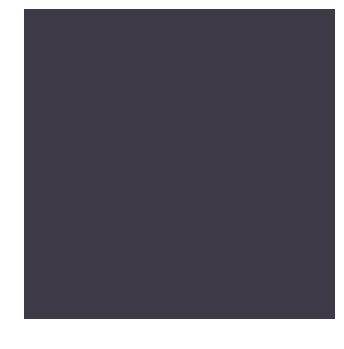

[ 152.66626006  166.53883687  184.99660425]


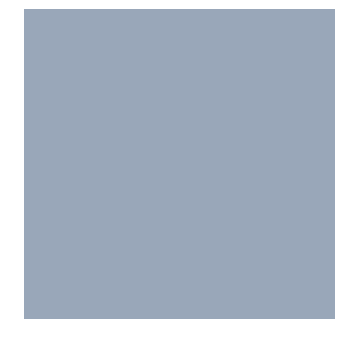

[ 80.56727214  79.05549479  92.89534505]


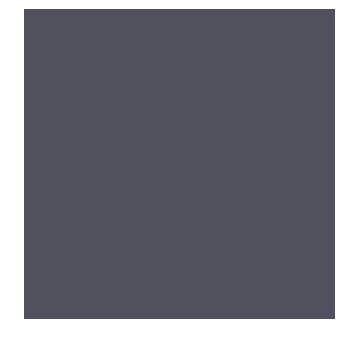

In [71]:
for ix in range(k):
    print clusters[ix]['center']
    
    size=(10,10,3)
    ab=np.zeros(size)
    ab[:,:,0]=255-int(clusters[ix]['center'][0])
    ab[:,:,1]=255-int(clusters[ix]['center'][1])
    ab[:,:,2]=255-int(clusters[ix]['center'][2])
    plt.axis('off')
    plt.imshow(ab)
    plt.show()
    

In [82]:
img2=img
for ix in range(img2.shape[0]):
    for iy in range(img2.shape[1]):
        distance=[]
        for ic in range(k):
            distance.append(dist(clusters[ic]['center'],img2[ix,iy,:]))
        distance=np.array(distance)
        c_id=distance.argmin()
        img2[ix,iy,:]=clusters[c_id]['center']

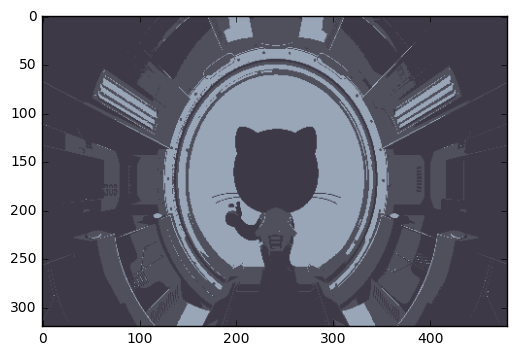

In [83]:
plt.imshow(img2)
plt.show()